In [1]:
from __future__ import division, print_function
__author__ = 'fbb CUSP 2016'
import os
import numpy as np
from numpy.random import randn
import pylab as pl

from pandas import Series, DataFrame
import pandas
import pandas as pd

PUIdata = os.getenv("PUIDATA")
print (PUIdata)

/Users/fbianco/science/Dropbox//UI/PUIdata


In [1]:
"""
Notebook that parces and formatts Table 6.1 of D. Lane's Introduction to Statistics
using Pandas functionalities

Refer to https://github.com/fedhere/UInotebooks/blob/master/dataWrangling/PandasDataWrangling-Chap7.ipynb
and Python for Data Analysis Chaoter 7
for more pandas data munging functions and methods!
"""

"\nNotebook that parces and formatts Table 6.1 of D. Lane's Introduction to Statistics\nusing Pandas functionalities\n\nRefer to https://github.com/fedhere/UInotebooks/blob/master/dataWrangling/PandasDataWrangling-Chap7.ipynb\nand Python for Data Analysis Chaoter 7\nfor more pandas data munging functions and methods!\n"

In [13]:
# setting up some preferences
%pylab inline

np.set_printoptions(precision=4, threshold=500)
np.random.seed(123321)
pl.rc('figure', figsize=(10, 6))
pd.options.display.max_rows = 100

Populating the interactive namespace from numpy and matplotlib


In [14]:
df_student = pd.read_csv(PUIdata + "/IntrotoStats_Table6_1.csv")
df_student['Hair Color'] = df_student['Hair Color'].replace({'Brown':1,'Blonde':0,'Black':2})

In [15]:
df_student

,#Students Name,Hair Color,Gender,Major,Height,Computer Experience
0,Norma,1,Female,Psychology,"5'4""",Lots
1,Amber,0,Female,Social Science,"5'7""",Very Little
2,Paul,0,Male,History,"6'1""",Moderate
3,Christopher,2,Male,Biology,"5'10""",Lots
4,Sonya,1,Female,Psychology,"5'4""",Little


In [16]:
df_student.Gender = df_student.Gender.replace('Female', 0)

In [17]:
df_student.Gender = df_student.Gender.replace('Male', 1)

In [18]:
experience_to_number = {
    'None' : 0,
    'Very Little' : 1,
    'Little' : 2,
    'Moderate' : 3,    
    'Good' : 4,
    'Lots' : 5
}

In [19]:
df_student['Experience'] = df_student['Computer Experience'].map(experience_to_number)  

In [20]:
df_student.drop(['Computer Experience', 'Major', '#Students Name'], axis=1, inplace=True)

In [21]:
df_student

,Hair Color,Gender,Height,Experience
0,1,0,"5'4""",5
1,0,0,"5'7""",1
2,0,1,"6'1""",3
3,2,1,"5'10""",5
4,1,0,"5'4""",2


In [22]:
def formatHeight(heightstring):
    hs = heightstring.replace('"','').split("'")
    return float(hs[0]) * 12 + float(hs[1])


In [23]:
df_student.Height = df_student.Height.map(formatHeight)

In [24]:
df_student

,Hair Color,Gender,Height,Experience
0,1,0,64,5
1,0,0,67,1
2,0,1,73,3
3,2,1,70,5
4,1,0,64,2


In [25]:
import numpy as np
import statsmodels.api as sm
logit_mod = sm.MNLogit(df_student.Experience, np.array([df_student.Height, 
                                               df_student['Hair Color'], 
                                               df_student.Gender]).T)
logit_res = logit_mod.fit()
print('Parameters: ', logit_res.params)

         Current function value: 0.277259
         Iterations: 35
Parameters:              0           1          2
x1  -0.430085   -0.468774  -0.329497
x2  49.557191   19.275407  43.119545
x3 -10.403709  100.547329  69.441349


//anaconda/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [26]:
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:             Experience   No. Observations:                    5
Model:                        MNLogit   Df Residuals:                       -4
Method:                           MLE   Df Model:                            6
Date:                Tue, 13 Sep 2016   Pseudo R-squ.:                  0.7919
Time:                        07:23:36   Log-Likelihood:                -1.3863
converged:                      False   LL-Null:                       -6.6609
                                        LLR p-value:                    0.1033
================================================================================
Experience=2       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
x1              -0.4301    2.7e+04  -1.59e-05      1.000     -5.29e+04  5.29e+04
x2              49.5572   1.73e+06   2.87e-05      1.000     -3.39e+06  3.39e+06
x3             -10.4037   1.18e+16  -8.83e-16      1.000     -2.31e+16  2.31e+16
--------------------------------------------------------------------------------
Experience=3       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
x1              -0.4688   8.83e+04  -5.31e-06      1.000     -1.73e+05  1.73e+05
x2              19.2754   3.05e+05   6.33e-05      1.000     -5.97e+05  5.97e+05
x3             100.5473    8.8e+07   1.14e-06      1.000     -1.72e+08  1.72e+08
--------------------------------------------------------------------------------
Experience=5       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
x1              -0.3295    928.392     -0.000      1.000     -1819.944  1819.285
x2              43.1195    8.5e+04      0.001      1.000     -1.67e+05  1.67e+05
x3              69.4413   8.78e+07   7.91e-07      1.000     -1.72e+08  1.72e+08
================================================================================
"""

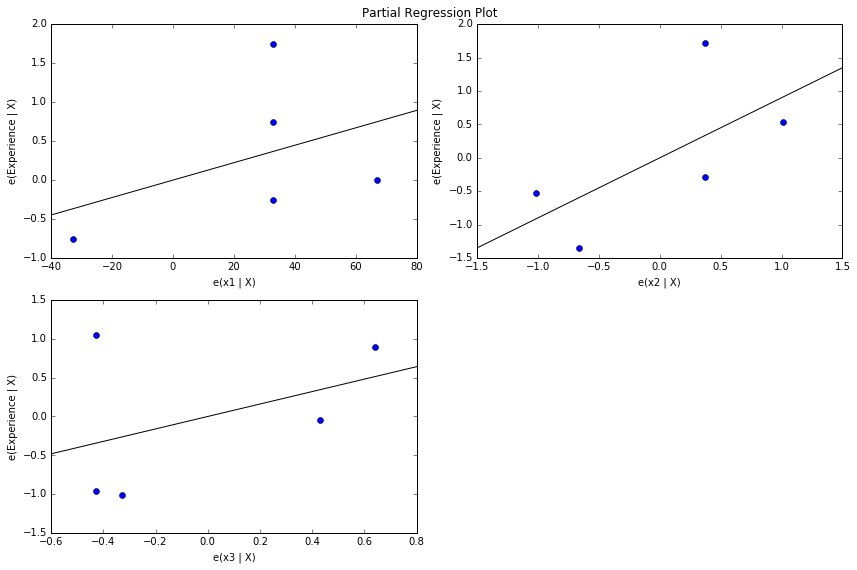

In [27]:
fig = pl.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(logit_res, fig=fig)
